In [9]:
import matplotlib.pyplot as plt
import numpy as np


In [10]:
def sigmoid(z):
  one = 1.
  two = 1+np.exp(-z)
  res = one/two
  return res


def relu(z):
  if z<= 0:
    return 0
  else:
    return z


def tanh(z):
  one = np.exp(z)- np.exp(-z)
  two = np.exp(z)+ np.exp(-z)
  res = one/two
  return res

def softplus(z):
  return np.log(1+ np.exp(z))


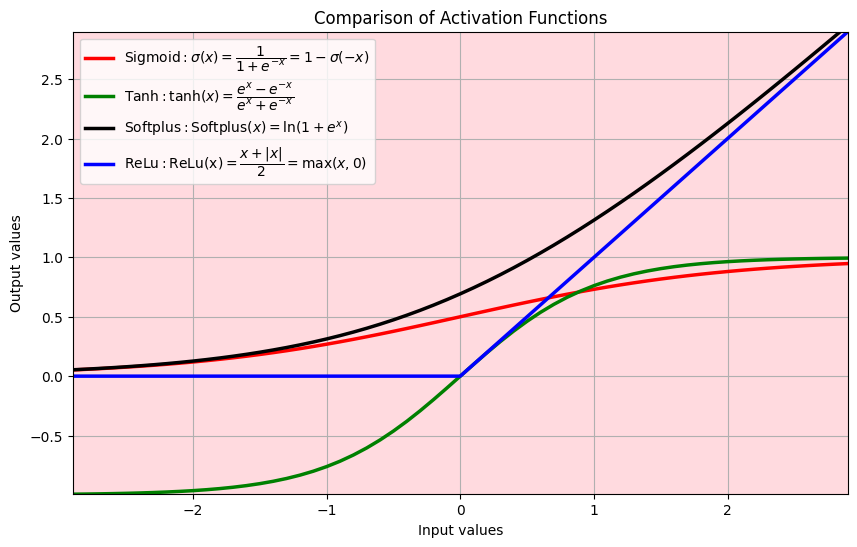

In [11]:
plt.figure(figsize=(10,6))
x = np.arange(-3, 3, 0.1)
y1= sigmoid(x)
y2 = list(map(relu, x))

y3 = tanh(x)

y4 = softplus(x)

plt.plot(x, y1 , c='red', lw=2.5,
         label = r'$\mathrm{Sigmoid}: \sigma(x)= \dfrac{1}{1+e^{-x} }=1 - \sigma(-x)$') #='Sigmoid')

plt.plot(x, y3, c='green', lw=2.5,
         label=r'$\mathrm{Tanh}: \tanh(x)= \dfrac{e^{x}- e^{-x}}{e^{x}+ e^{-x}}$')

plt.plot(x, y4, c='black', lw=2.5,
         label = r'$ \mathrm{Softplus}: \mathrm{Softplus}(x)= \ln(1 +e^x) $' ) # label='Softplus')

plt.plot(x, y2 , c='blue', lw=2.5, label=r'$\mathrm{ReLu}: \mathrm{ReLu(x)} = \dfrac{x+|x|}{2} = \max{(x,0)}$')
#r'$\mathrm{square}: f(x) = x^2$


plt.axhspan(-1, 3.2, facecolor='lightpink', alpha=0.5)

plt.title('Comparison of Activation Functions')
plt.xlabel('Input values')
plt.ylabel('Output values')
plt.grid()
plt.legend()
plt.xlim(-2.9,2.9)
plt.ylim(-0.99,2.9)
#plt.axis('off')
plt.show()

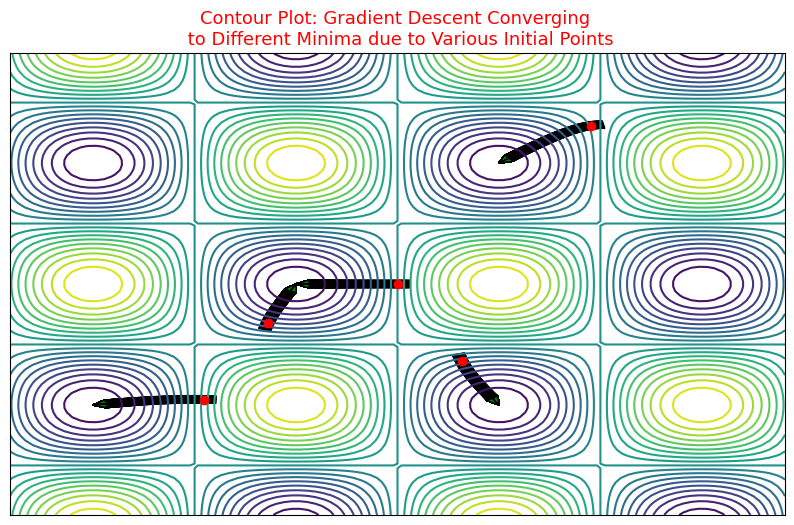

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#def func(x):
#    return 2*x[0]**4 -4*x[0]*x[1]+ 2*x[1]**4

# Define the gradient of the function
#def gradient(x):
#    return np.array([2*4*x[0]**3-4*x[1], 2*4*x[1]**3-4*x[0]])

def func(x):
    return np.sin(x[0]) * np.cos(x[1])

# Define the gradient of the function
def gradient(x):
    return np.array([np.cos(x[0]) * np.cos(x[1]), -np.sin(x[0]) * np.sin(x[1])])


# Gradient descent function with threshold
def gradient_descent(gradient_func, start_point, learning_rate, threshold=1e-6, max_iterations=100000):
    points = [start_point]
    new_point = start_point
    derivative_flat = np.linalg.norm(gradient_func(new_point))

    iteration = 0
    while derivative_flat > threshold and iteration < max_iterations:
        grad = gradient_func(new_point)
        new_point = new_point - learning_rate * grad
        derivative_flat = np.linalg.norm(grad)  # Update the norm of the gradient
        points.append(new_point)
        iteration += 1

    if iteration == max_iterations:
        print("Warning: Maximum number of iterations reached.")

    return points

# Generate data for contour plot
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])

# Choose starting points
#starting_points = [[-2, -2], [-1., 2], [2, 2], [2.5, -2], [0.9,3]]
starting_points = [[-3, -3], [-2, -1], [0, 0], [1, -2], [3, 4.1]]

#starting_points = [[1, 1], [-1, 1], [1, -1], [-1, -1]]


# Perform gradient descent from each starting point
optimized_paths = [gradient_descent(gradient, start_point, 0.01) for start_point in starting_points]

# Plot the contour plot
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
#plt.xlabel('x')
#plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.title(f'Contour Plot: Gradient Descent Converging \n to Different Minima due to Various Initial Points',
          fontsize=13, color='red')

# Plot starting points
for start_point in starting_points:
    plt.plot(start_point[0], start_point[1], 'ro')  # Red dot for starting points

# Plot arrows indicating optimization paths
for path in optimized_paths:
    for i in range(len(path) - 1):
        plt.arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1],
                  head_width=0.2, head_length=0.2, fc='green', ec='black', length_includes_head=True)

plt.show()





<ipython-input-7-b4557f30ed73>:32: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X, Y, Z, levels=100, color ='olive')


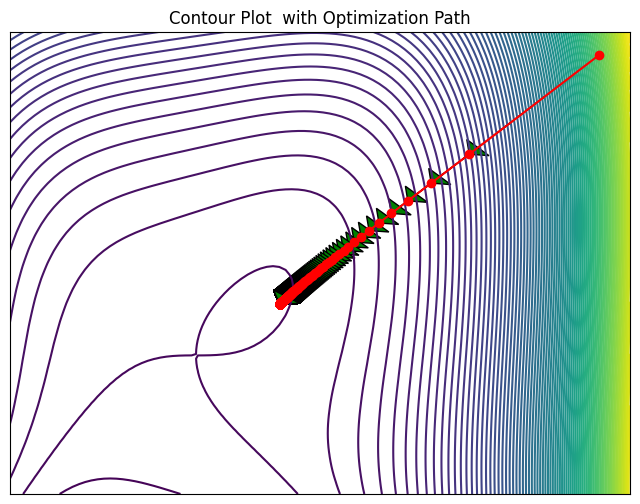

In [ ]:
def next(x):
    return x[0]**4 + x[1]**3- 4*x[0]*x[1]

# Define the gradient of the function
def next_gradient(x):
    return np.array([4*x[0]**3-4*x[1], 4*x[1]**3]-4*x[0])



# Generate data for contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = next([X, Y])

# Generate data for contour plot
x = np.linspace(-3, 7, 100)
y = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(x, y)
Z = next([X, Y])

# Choose a starting point
start_point = np.array([6.5, 6.5])
#start_point = np.array([-0.5, -0.5])


# Perform gradient descent
path = gradient_descent(next_gradient, start_point, 0.002)

# Plot the contour plot with the optimization path
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=100, color ='olive')
plt.xticks([])
plt.yticks([])
plt.title('Contour Plot  with Optimization Path')

# Plot the optimization path
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], '-ro')  # Red dots for optimization path

for i in range(len(path) - 1):
    plt.arrow(path[i, 0], path[i, 1], path[i+1, 0] - path[i, 0], path[i+1, 1] - path[i, 1],
              head_width=0.5, head_length=0.2, fc='green', ec='black', length_includes_head=True)

plt.show()

In [7]:
from PIL import Image

# Open the images
image1 = Image.open("modelit.webp")
image2 = Image.open("netxann.png")
image3 = Image.open("PitTumor.png")
image4 = Image.open("look.jpeg")
#image5 = Image.open("Grad1.png")


# Resize images if needed
image1 = image1.resize((400, 500))
image2 = image2.resize((600, 500))
image3 = image3.resize((600, 500))
image4 = image4.resize((400, 500))
#image5 = image5.resize((500, 500))



# Create a new blank image with white background
combined_image = Image.new("RGB", (1000, 1000), "white")

# Paste images onto the combined image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (400, 0))
combined_image.paste(image3, (0, 500))
combined_image.paste(image4, (600, 500))
#combined_image.paste(image5, (500, 500))


# Save or display the combined image
combined_image.save("combined_image.jpg")
combined_image.show()

